# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
btc_price = requests.get(btc_url)
btc_price = btc_price.json()["data"]["1"]["quotes"]["CAD"]["price"]


# Fetch current ETH price
eth_price = requests.get(eth_url)
eth_price = eth_price.json()["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crypto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $62518.40
The current value of your 5.3 ETH is $20620.72


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2021-12-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start = today,
    limit = 1000,
).df


# Preview DataFrame
df_ticker.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-12-23 00:00:00-05:00  114.29  114.31  114.07  114.19  5304915  468.75   
2021-12-27 00:00:00-05:00  114.15  114.30  114.13  114.27  5069840  472.03   
2021-12-28 00:00:00-05:00  114.43  114.45  114.17  114.22  4892072  477.72   
2021-12-29 00:00:00-05:00  113.99  114.05  113.81  113.87  5712959  477.00   
2021-12-30 00:00:00-05:00  113.99  114.13  113.83  114.12  5044053  477.93   

                                                             
                             high     low   close    volume  
time                                                         
2021-12-23 00:00:00-05:00  472.19  468.64  470.58  47149529  
2021-12-27 00:00:00-05:00  477.31  472.01  477.27  46260198  
2021-12-28 00:00:00-05:00  478.81  476.06  476.89  37370466  
2021-12-29 00:00:00-05:00  478.56  475.92  477.46  47223213  
2021-12-30 00:00:00-05:00  479.00  475.67  476.15  44681636

In [12]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"][0])
spy_close_price = float(df_ticker["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.19
Current SPY closing price: $470.58


In [13]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23529.00
The current value of your 200 AGG shares is $22838.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto =  my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

data = {"amount": [crypto, shares]}


# Create savings DataFrame
df_savings = pd.DataFrame(data, index = ["crypto","shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,83139.11861
shares,46367.00000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

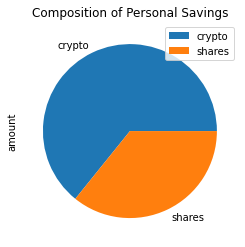

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings= df_savings ["amount"].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goal!")
else: 
    print(f"You are ${total_savings-emergency_fund} from reaching your goal")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-12-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-23', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df.dropna()

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2018-01-05 00:00:00-05:00  109.15  109.15  108.95  109.021  2936467  272.50   
2018-01-08 00:00:00-05:00  109.11  109.11  108.95  109.000  2842958  273.31   
2018-01-09 00:00:00-05:00  108.91  108.91  108.69  108.710  1991045  274.40   
2018-01-10 00:00:00-05:00  108.48  108.72  108.43  108.710  3272935  273.69   
2018-01-11 00:00:00-05:00  108.66  108.86  108.61  108.770  2652838  274.75   

                                                             
                             high     low   close    volume  
time                                                         
2018-01-05 00:00:00-05:00  273.56  271.95  273.39  45782622  
2018-01-08 00:00:00-05:00  274.10  272.98  273.93  33627800  
2018-01-09 00:00:00-05:00  275.25  274.09  274.53  40421422  
2018-01-10 00:00:00-05:00  274.42  272.92  274.10  41575815  
2018-01-11 00:00:00-05:00  276.09  274.56  276.08  39159808

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
df = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
df.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2018-01-05 00:00:00-05:00  109.15  109.15  108.95  109.021  2936467   
2018-01-08 00:00:00-05:00  109.11  109.11  108.95  109.000  2842958   
2018-01-09 00:00:00-05:00  108.91  108.91  108.69  108.710  1991045   
2018-01-10 00:00:00-05:00  108.48  108.72  108.43  108.710  3272935   
2018-01-11 00:00:00-05:00  108.66  108.86  108.61  108.770  2652838   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-05 00:00:00-05:00          NaN  272.50  273.56  271.95  273.39   
2018-01-08 00:00:00-05:00    -0.000193  273.31  274.10  272.98  273.93   
2018-01-09 00:00:00-05:00    -0.002661  274.40  275.25  274.09  274.53   
2018-01-10 00:00:00-05:00     0.000000  273.69  274.42  272.92  274.10   
2018-01-11 00:00:00-05:00     0.000552  274.75  276.09  274.56  276.08   

                                                  
                             volume daily_return  
time                                              
2018-01-05 00:00:00-05:00  45782622          NaN  
2018-01-08 00:00:00-05:00  33627800     0.001975  
2018-01-09 00:00:00-05:00  40421422     0.002190  
2018-01-10 00:00:00-05:00  41575815    -0.001566  
2018-01-11 00:00:00-05:00  39159808     0.007224

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
df.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\grise\Unit-5-Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999797,0.999297,1.012979,0.996339,0.987922,0.996658,1.001193,1.015416,0.992745,1.014255,...,1.004730,1.003744,0.993223,0.991610,1.001501,0.997927,0.999835,0.994515,0.986521,0.994049
2,0.997267,0.991771,1.014711,1.006644,0.990540,0.997248,1.012563,1.008976,0.979097,1.003555,...,1.017796,1.009567,0.974893,0.994213,0.998118,0.995268,0.988863,0.992086,0.983179,0.991788
3,0.988436,0.991009,1.017555,1.003140,1.007404,0.997017,0.992510,1.007196,0.975177,1.012128,...,1.000925,1.017770,0.992735,1.002500,1.011214,1.001091,0.990966,0.972987,0.977984,0.987278
4,0.998105,0.989078,1.034211,0.995087,1.011603,1.014303,0.998926,1.001455,0.979455,0.999779,...,1.014802,1.022632,0.999270,0.994730,1.014968,0.994006,0.989379,0.984400,0.979496,0.985368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,21.904520,6.011054,25.724793,8.297563,49.085855,26.917110,8.398713,9.952288,12.974185,24.866821,...,18.891479,21.877622,47.379216,16.485551,52.499527,76.463406,11.502721,14.554092,8.317804,12.106922
7557,21.854750,6.052760,25.348184,8.200258,49.397627,27.348589,8.562240,9.948031,13.064972,25.010365,...,18.819398,21.749489,47.608935,16.458351,52.162723,76.279674,11.513250,14.338142,8.365567,12.177615
7558,21.907034,6.098641,25.306816,8.203339,49.070413,27.697665,8.455562,9.874021,13.205941,24.825518,...,18.835832,21.583267,47.559495,16.742226,52.065102,76.956943,11.493413,14.367092,8.430715,12.024023
7559,21.922417,6.176097,25.434065,8.039496,49.180575,27.878332,8.470047,9.744028,13.138044,24.827654,...,18.932739,21.508545,47.493573,16.621817,52.103933,78.214473,11.717581,14.295263,8.342240,12.114819


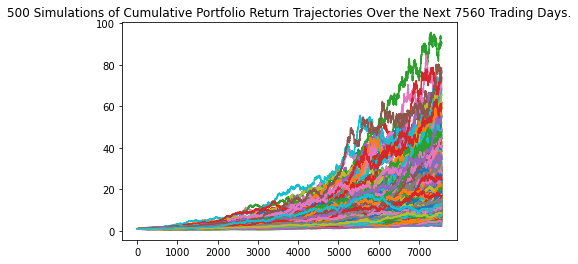

In [23]:
# Plot simulation outcomes
line_plot = df.plot_simulation()

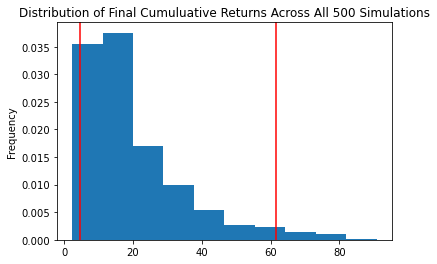

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = df.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = df.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             20.156802
std              14.834023
min               2.316224
25%               9.677035
50%              16.485805
75%              24.965327
max              90.763022
95% CI Lower      4.532556
95% CI Upper     61.601728
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $90651.12 and $1232034.56


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $135976.67 and $1848051.84


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
df_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

df_fiveyear.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2018-01-05 00:00:00-05:00  109.15  109.15  108.95  109.021  2936467   
2018-01-08 00:00:00-05:00  109.11  109.11  108.95  109.000  2842958   
2018-01-09 00:00:00-05:00  108.91  108.91  108.69  108.710  1991045   
2018-01-10 00:00:00-05:00  108.48  108.72  108.43  108.710  3272935   
2018-01-11 00:00:00-05:00  108.66  108.86  108.61  108.770  2652838   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-05 00:00:00-05:00          NaN  272.50  273.56  271.95  273.39   
2018-01-08 00:00:00-05:00    -0.000193  273.31  274.10  272.98  273.93   
2018-01-09 00:00:00-05:00    -0.002661  274.40  275.25  274.09  274.53   
2018-01-10 00:00:00-05:00     0.000000  273.69  274.42  272.92  274.10   
2018-01-11 00:00:00-05:00     0.000552  274.75  276.09  274.56  276.08   

                                                  
                             volume daily_return  
time                                              
2018-01-05 00:00:00-05:00  45782622          NaN  
2018-01-08 00:00:00-05:00  33627800     0.001975  
2018-01-09 00:00:00-05:00  40421422     0.002190  
2018-01-10 00:00:00-05:00  41575815    -0.001566  
2018-01-11 00:00:00-05:00  39159808     0.007224

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
df_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\grise\Unit-5-Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992228,1.001200,1.002386,1.000290,0.996085,1.002137,0.998960,1.003338,1.005494,0.998377,...,0.994509,0.999379,0.999507,1.014607,0.984179,0.990950,0.992897,0.991604,0.999224,0.987173
2,0.991956,0.999114,0.991715,0.992370,0.996541,1.011348,0.992747,1.012183,1.009219,0.993601,...,0.992299,0.991213,0.997236,1.009959,0.984004,0.994131,0.986969,0.990855,0.988820,0.987093
3,0.996531,1.004204,0.998572,0.998269,0.998506,1.015527,0.993865,1.008488,1.009957,0.992315,...,0.990590,0.998666,0.995186,1.012414,0.983920,0.996290,0.984616,0.995961,0.987414,0.983775
4,0.996631,1.001761,0.992536,0.992595,1.000527,1.016403,0.997209,1.022079,1.008679,0.995090,...,0.989533,1.004532,0.997549,1.021783,0.984780,0.986725,0.974662,1.000258,0.987366,0.985139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.079807,1.562959,1.375824,1.011227,1.310799,1.101406,2.001079,1.494871,1.687205,1.496902,...,1.168228,1.261853,1.171098,1.539259,2.016856,1.134209,1.758026,1.714032,1.131303,1.352863
1257,1.079221,1.567507,1.360457,1.017317,1.301087,1.103454,2.008513,1.494505,1.685368,1.498955,...,1.179074,1.271703,1.172621,1.547215,2.026541,1.137471,1.744182,1.717908,1.124984,1.347339
1258,1.076249,1.570781,1.372987,1.023301,1.303133,1.104051,2.010471,1.488683,1.688205,1.491244,...,1.177915,1.277013,1.169077,1.538672,2.019559,1.140765,1.743029,1.712359,1.128855,1.336555
1259,1.085375,1.563992,1.365240,1.025223,1.306744,1.097363,2.008456,1.493124,1.698192,1.497813,...,1.186593,1.275247,1.159822,1.554969,2.014958,1.138708,1.735295,1.711312,1.116514,1.341948


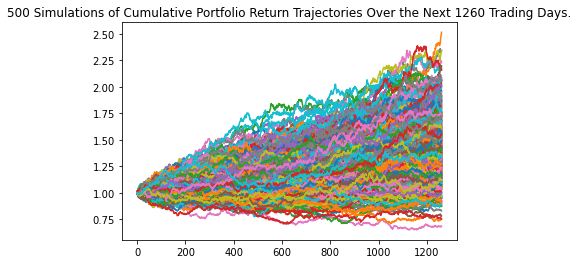

In [33]:
# Plot simulation outcomes
line_plot_fiveyear = df_fiveyear.plot_simulation()

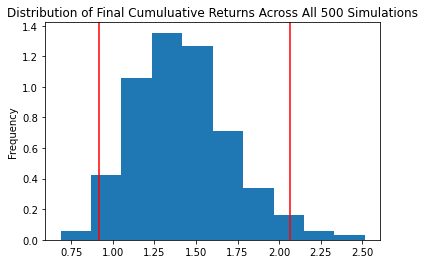

In [34]:
# Plot probability distribution and confidence intervals
dist_plot_fiveyear = df_fiveyear.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_fiveyear = df_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_fiveyear)

count           500.000000
mean              1.416297
std               0.294024
min               0.685182
25%               1.201057
50%               1.394312
75%               1.586655
max               2.516172
95% CI Lower      0.915457
95% CI Upper      2.063290
Name: 1260, dtype: float64


In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $90651.12 and $1232034.56


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
df_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

df_tenyear.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2018-01-05 00:00:00-05:00  109.15  109.15  108.95  109.021  2936467   
2018-01-08 00:00:00-05:00  109.11  109.11  108.95  109.000  2842958   
2018-01-09 00:00:00-05:00  108.91  108.91  108.69  108.710  1991045   
2018-01-10 00:00:00-05:00  108.48  108.72  108.43  108.710  3272935   
2018-01-11 00:00:00-05:00  108.66  108.86  108.61  108.770  2652838   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-05 00:00:00-05:00          NaN  272.50  273.56  271.95  273.39   
2018-01-08 00:00:00-05:00    -0.000193  273.31  274.10  272.98  273.93   
2018-01-09 00:00:00-05:00    -0.002661  274.40  275.25  274.09  274.53   
2018-01-10 00:00:00-05:00     0.000000  273.69  274.42  272.92  274.10   
2018-01-11 00:00:00-05:00     0.000552  274.75  276.09  274.56  276.08   

                                                  
                             volume daily_return  
time                                              
2018-01-05 00:00:00-05:00  45782622          NaN  
2018-01-08 00:00:00-05:00  33627800     0.001975  
2018-01-09 00:00:00-05:00  40421422     0.002190  
2018-01-10 00:00:00-05:00  41575815    -0.001566  
2018-01-11 00:00:00-05:00  39159808     0.007224

In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
df_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\grise\Unit-5-Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005524,0.995057,0.997931,0.997647,1.006209,1.005501,0.998883,0.989796,0.995139,0.989962,...,1.008242,0.995512,1.002143,1.005362,1.000690,0.997846,0.994096,1.007097,1.006058,0.996674
2,1.009946,1.000943,0.994855,0.993397,1.004104,1.008442,1.010353,0.980851,0.989658,0.983232,...,1.009719,0.995751,0.991816,1.018754,1.009194,1.009563,0.982824,0.999151,1.003913,1.003420
3,1.010214,0.993835,0.987973,0.994622,1.008420,1.023567,1.006022,0.979369,0.989454,0.986543,...,1.015170,0.983079,0.994265,1.023386,1.002977,1.008517,0.978940,1.004666,0.999585,0.997665
4,1.005858,0.994585,0.987742,0.998686,1.008912,1.023431,1.008818,0.990299,0.980937,0.979395,...,1.019404,0.988729,0.996616,1.022567,1.004807,1.009951,0.970183,0.996026,1.003106,1.004847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.704848,1.951248,1.165493,2.620077,2.662202,2.803518,3.183794,2.029231,2.320148,1.464294,...,2.150447,1.805157,1.932640,1.235834,1.500176,1.852629,2.617534,2.995426,2.156049,2.545642
2517,1.705884,1.941208,1.159083,2.630491,2.663730,2.797124,3.161362,2.033527,2.331707,1.459689,...,2.134287,1.800633,1.937009,1.238453,1.493252,1.857367,2.615694,2.980494,2.158249,2.553141
2518,1.710155,1.931849,1.152990,2.624091,2.677873,2.804407,3.156295,2.043055,2.309559,1.461134,...,2.130245,1.820891,1.925467,1.228909,1.484012,1.845953,2.610946,3.009002,2.122725,2.562709
2519,1.718571,1.930798,1.157664,2.626805,2.681619,2.807049,3.165417,2.047978,2.329723,1.468509,...,2.128096,1.803125,1.943325,1.227828,1.495100,1.850580,2.609892,2.997365,2.134044,2.562731


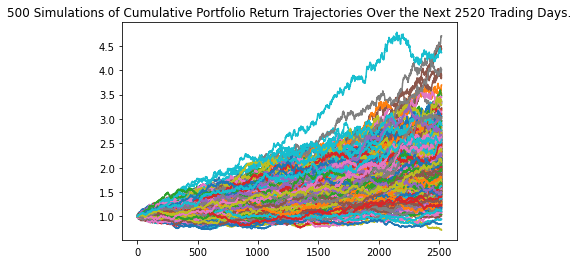

In [39]:
# Plot simulation outcomes
line_plot_tenyear = df_tenyear.plot_simulation()

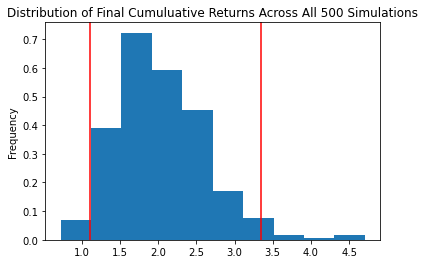

In [40]:
# Plot probability distribution and confidence intervals
dist_plot_tenyear = df_tenyear.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_tenyear = df_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_tenyear)

count           500.000000
mean              2.036350
std               0.584352
min               0.721651
25%               1.623574
50%               1.947929
75%               2.394900
max               4.706851
95% CI Lower      1.109313
95% CI Upper      3.343411
Name: 2520, dtype: float64


In [42]:
# Set initial investment
inital_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $90651.12 and $1232034.56
